**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

**Importing dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_ds.csv to titanic_ds.csv


In [ ]:
# Reading the csv file
df = pd.read_csv('titanic_ds.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print("Percentage of missing values in Age is",177/891*100)
print('Percentage of missing values in Cabin is',687/891*100)
print("Percentage of missing values in Embarked is",2/891*100)

Percentage of missing values in Age is 19.865319865319865
Percentage of missing values in Cabin is 77.10437710437711
Percentage of missing values in Embarked is 0.22446689113355783


In [ ]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df['Embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


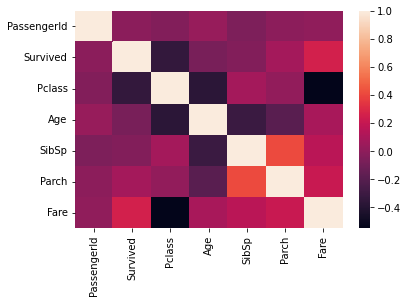

In [ ]:
sns.heatmap(df.corr())

**Handling missing values**

It is observed that the variable cabin has highest missing value which is of 77%. Then Age has missing value of 19.87% and Embarked has 0.224%.

In [ ]:
# Dropping of 'Cabin' variable as it has highest missing values.
df = df.drop(columns='Cabin',axis=1)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Filling NAN values with 'median' values
df['Age'] = df['Age'].fillna(df['Age'].median())


In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked       891
dtype: int64

**Removal of unwanted columns**

---



In [ ]:
df = df.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [ ]:
print(df)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  28.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


**Outlier Detection**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


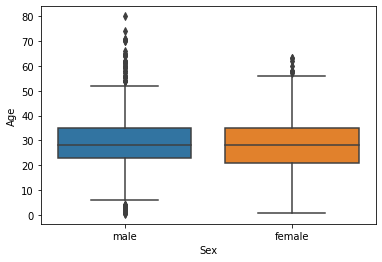

In [ ]:
sns.boxplot(df['Sex'],df['Age'])

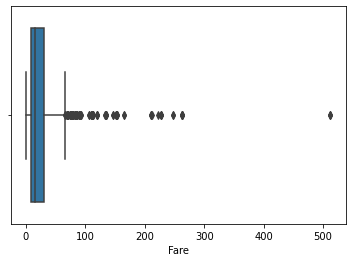

In [ ]:
sns.boxplot(x = df['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


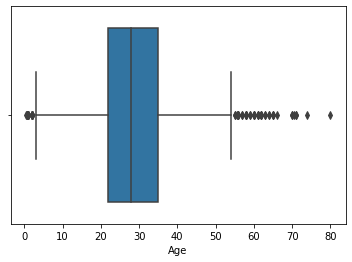

In [ ]:
sns.boxplot(df['Age'])

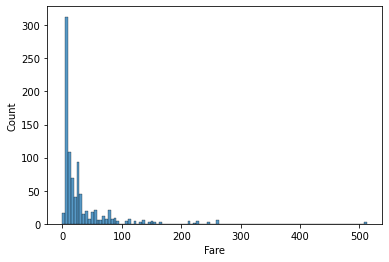

In [ ]:
# Histogram shows the outlier presence of numerical variable by righ or left skew
sns.histplot(df['Fare'])

In [ ]:
print('Skewness of Fare-',df['Fare'].skew())
print('Skewness of Age-',df['Age'].skew())

Skewness of Fare- 4.787316519674893
Skewness of Age- 0.5102446555756495


The skewness range is between -1 to 1. Here the fare variable is rightly skewed which indicates the presence of more outliers.

In [ ]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
Outlier_Fare = df[(df['Fare']<Q1-1.5*IQR)|(df['Fare']>Q3+1.5*IQR)]
Outlier_Fare.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
27,0,1,male,19.0,3,2,263.0000,S
31,1,1,female,28.0,1,0,146.5208,C
34,0,1,male,28.0,1,0,82.1708,C
52,1,1,female,49.0,1,0,76.7292,C


**Visualisation**

AxesSubplot(0.125,0.125;0.775x0.755)
577


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


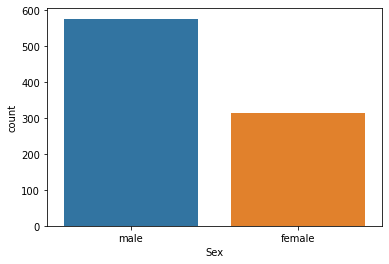

In [ ]:
print(sns.countplot(df['Sex']))



In [ ]:
TTprint('Male',(df['Sex']=='male').sum()/891*100)
print('Female',(df['Sex']=='female').sum()/891*100)

Male 64.75869809203144
Female 35.24130190796858


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


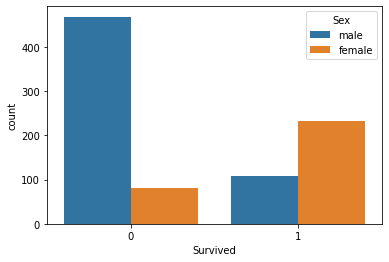

In [ ]:
sns.countplot(df['Survived'],hue=df['Sex'])

In [ ]:
print((df['Survived']==0).sum()/891*100)
print((df['Survived']==1).sum()/891*100)

61.61616161616161
38.38383838383838


It is observed that survival rate of female is more than the male.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


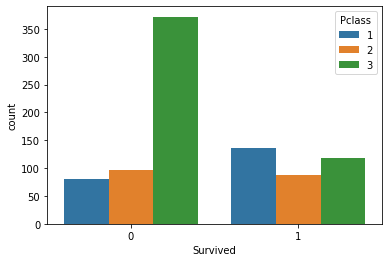

In [ ]:
sns.countplot(df['Survived'],hue=df['Pclass'])

Also it is noted that survival rate at 1st class is more and death rate is more at 3rd class

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


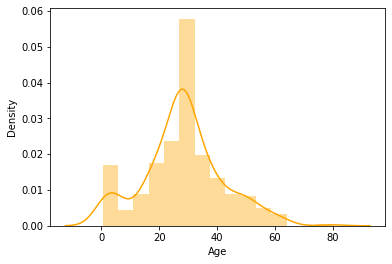

In [ ]:
sns.distplot(df['Age'][df['Survived']==1],color='orange',bins=15)

The survival rate of young children was more.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


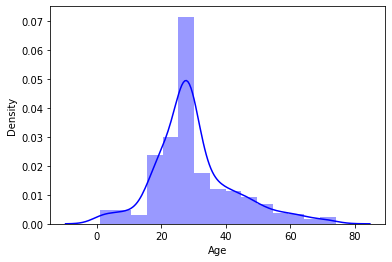

In [ ]:
sns.distplot(df['Age'][df['Survived']==0],color='blue',bins=15)

From this plot, it is observed that the death rate of age group of 60 - 80 is more

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


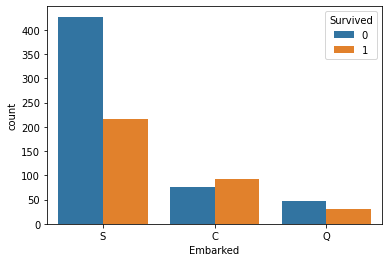

In [ ]:
sns.countplot(df['Embarked'],hue=df['Survived'])


**Encoding Categorical Variables**

In [ ]:
DF = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
print(DF)

     Survived  Pclass   Age  SibSp  ...     Fare  Sex_male  Embarked_Q  Embarked_S
0           0       3  22.0      1  ...   7.2500         1           0           1
1           1       1  38.0      1  ...  71.2833         0           0           0
2           1       3  26.0      0  ...   7.9250         0           0           1
3           1       1  35.0      1  ...  53.1000         0           0           1
4           0       3  35.0      0  ...   8.0500         1           0           1
..        ...     ...   ...    ...  ...      ...       ...         ...         ...
886         0       2  27.0      0  ...  13.0000         1           0           1
887         1       1  19.0      0  ...  30.0000         0           0           1
888         0       3  28.0      1  ...  23.4500         0           0           1
889         1       1  26.0      0  ...  30.0000         1           0           0
890         0       3  32.0      0  ...   7.7500         1           1           0

[89

**Train test split**

In [ ]:
x = DF.iloc[:,1:9]
y = DF.iloc[:,0]

In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(x)

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.66386103,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.25833709, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971]])

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=11)

In [ ]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()

In [ ]:
Log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = Log.predict(x_test)

**Evaluation Metrics**

In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score,f1_score
cm = confusion_matrix(y_test,y_pred)
print('Confusion',cm)
recall = recall_score(y_test,y_pred)
print('Recall',recall)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)
precision = precision_score(y_test,y_pred)
print('Precision',precision)
F1score = f1_score(y_test,y_pred)
print('F1 score',F1score)

Confusion [[154  22]
 [ 23  69]]
Recall 0.75
Accuracy 0.832089552238806
Precision 0.7582417582417582
F1 score 0.7540983606557377
